In [13]:
# 01 — EDA & Risk Framing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("creditcard.csv")
cols = list(df.columns)

label_col = "Class" if "Class" in cols else "class"
time_col  = "Time"  if "Time"  in cols else "time"
amount_col= "Amount" if "Amount" in cols else "amount"

df[label_col] = pd.to_numeric(df[label_col], errors="coerce").fillna(0).astype(int)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Label column:", label_col, "| Time:", time_col, "| Amount:", amount_col)
df.head()

Shape: (284807, 31)
Columns: ['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount', 'class']
Label column: class | Time: time | Amount: amount


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class counts: {0: 284315, 1: 492}
Fraud rate: 0.1727%


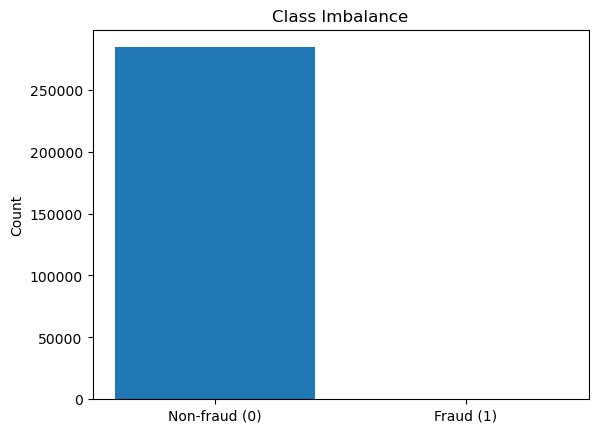

In [17]:
# Class imbalance
class_counts = df[label_col].value_counts().sort_index()
fraud_rate = class_counts.get(1, 0) / class_counts.sum()

print("Class counts:", class_counts.to_dict())
print(f"Fraud rate: {fraud_rate:.4%}")

plt.figure()
plt.bar(["Non-fraud (0)", "Fraud (1)"], [class_counts.get(0,0), class_counts.get(1,0)])
plt.title("Class Imbalance")
plt.ylabel("Count")
plt.show()

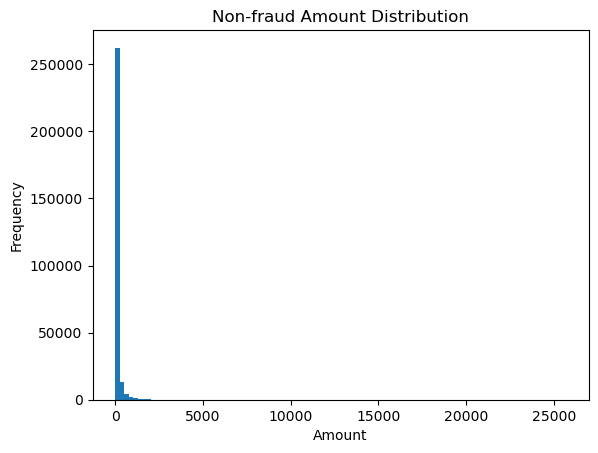

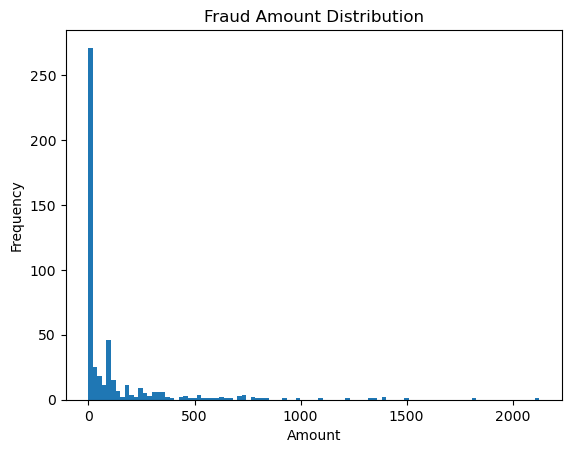

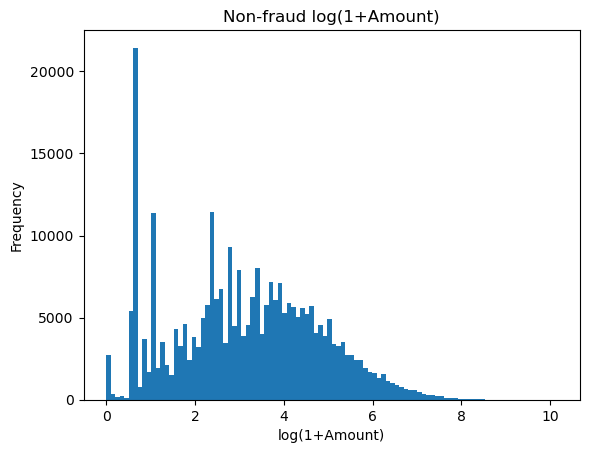

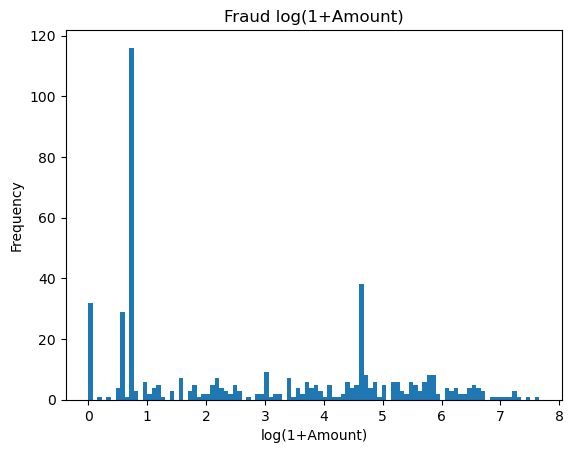

In [19]:
# Amount distributions (raw + log-scale)
fraud_df = df[df[label_col] == 1]
nonfraud_df = df[df[label_col] == 0]

plt.figure()
plt.hist(nonfraud_df[amount_col].values, bins=100)
plt.title("Non-fraud Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(fraud_df[amount_col].values, bins=100)
plt.title("Fraud Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(np.log1p(nonfraud_df[amount_col].values), bins=100)
plt.title("Non-fraud log(1+Amount)")
plt.xlabel("log(1+Amount)")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(np.log1p(fraud_df[amount_col].values), bins=100)
plt.title("Fraud log(1+Amount)")
plt.xlabel("log(1+Amount)")
plt.ylabel("Frequency")
plt.show()

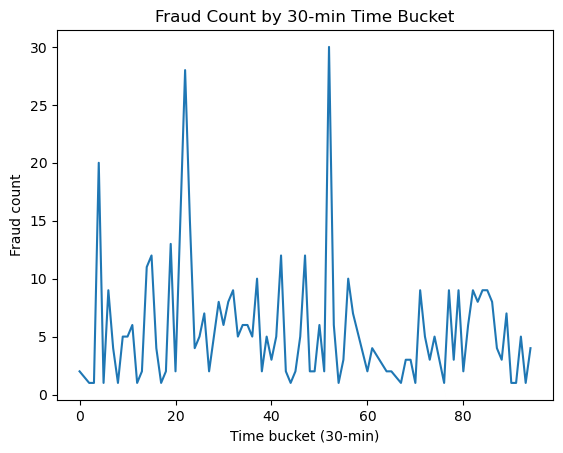

In [21]:
# Time dynamics: fraud count by time bucket (30 min)
bucket_seconds = 60 * 30
df["time_bucket"] = (df[time_col] // bucket_seconds).astype(int)

fraud_by_bucket = df[df[label_col] == 1].groupby("time_bucket").size()

plt.figure()
plt.plot(fraud_by_bucket.index, fraud_by_bucket.values)
plt.title("Fraud Count by 30-min Time Bucket")
plt.xlabel("Time bucket (30-min)")
plt.ylabel("Fraud count")
plt.show()

In [23]:
# Decision framing (printable narrative)
print("""
Why this is not a standard classification problem:
- Fraud rate is ~0.17% → accuracy is misleading.
- False negatives (missed fraud) cause direct financial loss (often proportional to Amount).
- False positives cause customer friction + operational review cost.
Therefore, we treat ML as a risk scoring system:
- model outputs P(fraud)
- policy converts risk scores into actions (Allow / Flag / Block)
- thresholds should minimize expected loss and respect review capacity.
""")


Why this is not a standard classification problem:
- Fraud rate is ~0.17% → accuracy is misleading.
- False negatives (missed fraud) cause direct financial loss (often proportional to Amount).
- False positives cause customer friction + operational review cost.
Therefore, we treat ML as a risk scoring system:
- model outputs P(fraud)
- policy converts risk scores into actions (Allow / Flag / Block)
- thresholds should minimize expected loss and respect review capacity.

